In [2]:
import seaborn as sns
df = sns.load_dataset('iris')
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
sepcies_set = df.loc[df.species=='setosa','sepal_width']
sepcies_ver = df.loc[df.species=='versicolor','sepal_width']
sepcies_vir = df.loc[df.species=='virginica','sepal_width']

# shapiro() 함수 이용해 각 자료에 대한 정규성 검증

In [5]:
from scipy.stats import shapiro, levene, bartlett

print(shapiro(sepcies_set))
print(shapiro(sepcies_ver))
print(shapiro(sepcies_vir))

#p-value값이 0.5보다 크므로 각각의 자료가 정규성을 가지는 것을 확인 가

ShapiroResult(statistic=0.971718966960907, pvalue=0.2715126574039459)
ShapiroResult(statistic=0.9741329550743103, pvalue=0.3379843533039093)
ShapiroResult(statistic=0.9673907160758972, pvalue=0.18089871108531952)


# levene, bartlett 함수로 등분산 검정

In [6]:
print(levene(sepcies_set, sepcies_ver, sepcies_vir))
print(bartlett(sepcies_set, sepcies_ver, sepcies_vir))

#p-value값이 0.05이상으로 등분산 충

LeveneResult(statistic=0.5902115655853319, pvalue=0.5555178984739075)
BartlettResult(statistic=2.0910752014392338, pvalue=0.35150280041580323)


# 각 자료의 평균과 표준편차 확인

In [7]:
import numpy as np
print("one_sample 평균 1)", np.mean(sepcies_set))
print("one_sample 평균 2)", np.mean(sepcies_ver))
print("one_sample 평균 3)", np.mean(sepcies_vir))
print("one_sample 표준편차 1)", np.std(sepcies_set))
print("one_sample 표준편차 2)", np.std(sepcies_ver))
print("one_sample 표준편차 3)", np.std(sepcies_vir))

one_sample 평균 1) 3.428
one_sample 평균 2) 2.7700000000000005
one_sample 평균 3) 2.974
one_sample 표준편차 1) 0.37525458025186054
one_sample 표준편차 2) 0.31064449134018135
one_sample 표준편차 3) 0.3192553836664309


# f_oneway함수적용

In [8]:
from scipy.stats import f_oneway

result = f_oneway(sepcies_set, sepcies_ver, sepcies_vir)

print("f 검정 통계랑 %.5f, p값 %.5f"%result)

#%p값이 0.05보다 작아 귀무가설 기각

f 검정 통계랑 49.16004, p값 0.00000


In [9]:
from statsmodels.formula.api import ols

lmFit = ols('sepal_width~C(species)',data=df).fit()
print(lmFit.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     49.16
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           4.49e-17
Time:                        07:34:28   Log-Likelihood:                -49.366
No. Observations:                 150   AIC:                             104.7
Df Residuals:                     147   BIC:                             113.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [11]:
#anova함수에 회귀모형 적합
#분산 분석표 출력
from statsmodels.stats.anova import anova_lm

table = anova_lm(lmFit)
print(table)

               df     sum_sq   mean_sq         F        PR(>F)
C(species)    2.0  11.344933  5.672467  49.16004  4.492017e-17
Residual    147.0  16.962000  0.115388       NaN           NaN


## 각 집단간의 차이를 알아보기위한 사후분석

In [12]:
#1.본페로니 방법 사용
from statsmodels.sandbox.stats.multicomp import MultiComparison
comp = MultiComparison(df.sepal_width, df.species)

from scipy.stats import ttest_ind
result = comp.allpairtest(ttest_ind, method ='bonf')

print(result[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
  group1     group2     stat   pval  pval_corr reject
-----------------------------------------------------
    setosa versicolor   9.455    0.0       0.0   True
    setosa  virginica  6.4503    0.0       0.0   True
versicolor  virginica -3.2058 0.0018    0.0055   True
-----------------------------------------------------


TuskeHSD 방법

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc1 = pairwise_tukeyhsd(df.sepal_width, df.species, alpha = 0.05)

print(posthoc1)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    setosa versicolor   -0.658    0.0 -0.8189 -0.4971   True
    setosa  virginica   -0.454    0.0 -0.6149 -0.2931   True
versicolor  virginica    0.204 0.0088  0.0431  0.3649   True
------------------------------------------------------------


Figure(1000x600)


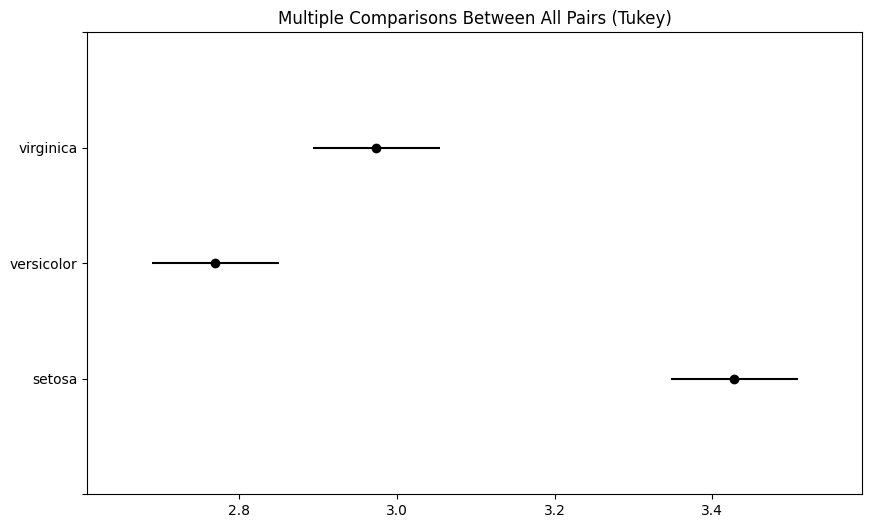

In [14]:
print(posthoc1.plot_simultaneous())